# Lab 5 - Exploratory Data Analysis

In [1]:
% matplotlib inline

UsageError: Line magic function `%` not found.


## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. It should say `In [1]` for the first codecell and increase by 1 throughout.

## Exploratory Data Analysis

In this Module, we partitioned the problem of EDA using a taxonomy with the following characteristics:

* **Data Type**: Numerical or Categorical.
* **Number of Variables**: 1 or many.
* **Technique**: descriptive statistics, tables or charts.

we will skip "goal" for now.

And we came up with a general set of tools for analyzing data, not all of them applicable to all the cases:

* Descriptive Statistics
* Frequency Table (absolute and relative)
* Histograms
* Boxplots Plot
* Bar chart
* Dot chart
* Heat map
* Scatter Plot

This does not exhaust all the chart types, though. We also have the following basic chart types that we talked about in the Visualization Module:

* Points
* Lines
* Lines and points

The goal for this lab is to get you acquainted with most of these tools by analyzing a real data set. Follow the general directions in this Module for *methodical* EDA including:

1. Single Variable Exploration.
2. Correlation or Problem driven Exploration of Pairwise Relationships.

Because we don't really have a problem or question here, we may have to be exhaustive. There are 21 comparisons possible, start with any 5 of them and then use what you discover to add 5 more.

And for each case, try different visualizations. What does a histogram tell you that a box-and-whiskers plot does not and vice versa? What about different bin sizes? And the most important bit: you must write something for every single chart you produce. The emphasis here is on *science*. At every juncture, you must say:

1. **Why am I trying this?** "I'm going to look at this data using a box and whiskers plot to explore its general shape." "I am trying more bins to see if the histogram reveals any interesting characteristics."
2. **Do it.**
3. **What did I learn?** "Although I know the data is generated from a normal distribution, it doesn't look normally distributed. The sample mean is X while the true mean is Y."

In EDA, you should generally never just *change* anything. You should copy your code, explain why you're making some change to the parameters, make the change and then note what happens.

Be inventive and creative.

In [2]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


sns.set(style="whitegrid")

# Answer

### Overview

In this analysis, I would focus on how charges of the insurance is impacted by different factors including age, sex, bmi, children, smoker, region based on the insurance dataset. I would first look into the single variable exploration for all variables and then do a EDA between charges and each of those categorical/numerical variables.

In [3]:
data = pd.read_csv('insurance.csv')
#data.head()

#### Age

In [4]:
#Descriptive Statistics
data.age.describe().round()

count    1338.0
mean       39.0
std        14.0
min        18.0
25%        27.0
50%        39.0
75%        51.0
max        64.0
Name: age, dtype: float64

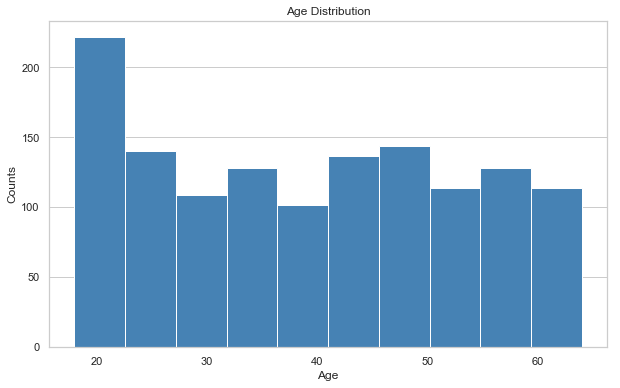

In [5]:
#Age Distribution
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(data.age, color="steelblue")
axes.set_title("Age Distribution")
axes.set_xlabel("Age")
axes.set_ylabel("Counts")
axes.yaxis.grid( b=True, which="major")
axes.xaxis.grid(False)
plt.show()
plt.close()

Summary: age distribution has minimum at 18 and maximum at 64 with age 20 has the most counts and mean at age 39.

#### Gender

In [6]:
data.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [7]:
pd.DataFrame(data.sex.value_counts().sort_index())

,sex
female,662
male,676


In [8]:
pd.DataFrame(data.sex.value_counts( normalize=True).sort_index())

,sex
female,0.494768
male,0.505232


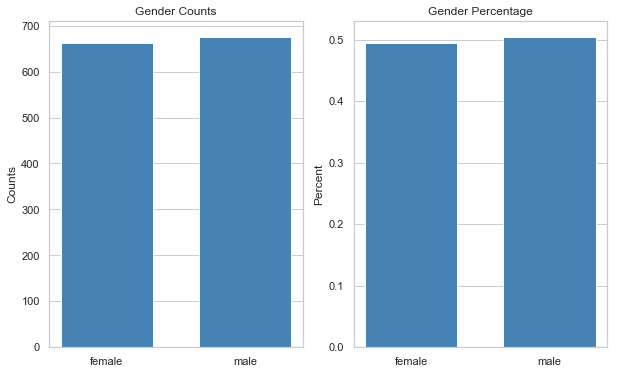

In [9]:
counts = data.sex.value_counts().sort_index()
proportions = data.sex.value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 2, 1)
axes.bar(x, counts, width, color="steelblue", align="center")
axes.set_xticks([0, 1])
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Gender Counts")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.bar(x, proportions, width, color="steelblue", align="center")
axes.set_xticks([0, 1])
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Gender Percentage")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)



Summary: Gender has fairly even distribution with 49% female and 51% male

#### BMI

In [10]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

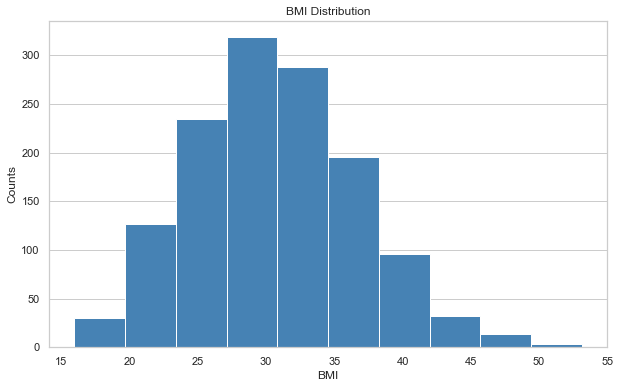

In [11]:
#Age Distribution
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(data.bmi, color="steelblue")
axes.set_title("BMI Distribution")
axes.set_xlabel("BMI")
axes.set_ylabel("Counts")
axes.yaxis.grid( b=True, which="major")
axes.xaxis.grid(False)
plt.show()
plt.close()

Summary: BMI has a normal distribution with the mean at 30 and range between 16 and 53

#### Children

In [12]:
data.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [13]:
pd.DataFrame(data.children.value_counts().sort_index())

,children
0,574
1,324
2,240
3,157
4,25
5,18


In [14]:
pd.DataFrame(data.children.value_counts( normalize=True).sort_index())

,children
0,0.428999
1,0.242152
2,0.179372
3,0.117339
4,0.018685
5,0.013453


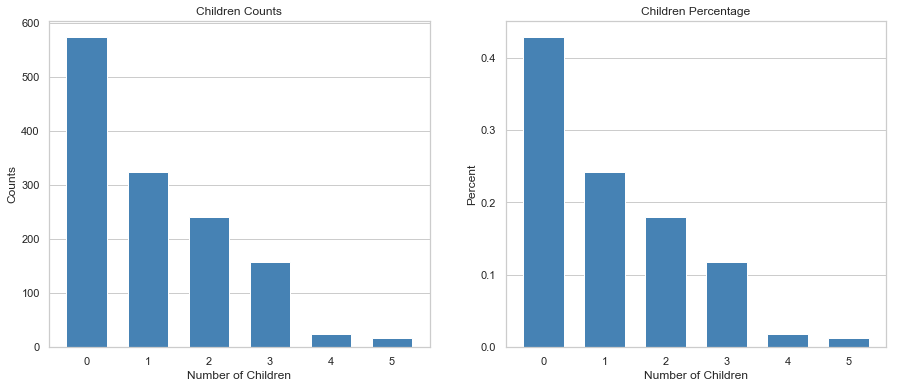

In [15]:
counts = data.children.value_counts().sort_index()
proportions = data.children.value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(15, 6))
axes = figure.add_subplot(1, 2, 1)
axes.bar(x, counts, width, color="steelblue", align="center")
axes.set_xticks([0, 1 , 2, 3, 4, 5])
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Children Counts")
axes.set_xlabel( "Number of Children")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.bar(x, proportions, width, color="steelblue", align="center")
axes.set_xticks([0, 1 , 2, 3, 4, 5])
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Children Percentage")
axes.set_xlabel( "Number of Children")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)


Summary: in the data, we have 43% people with children and 57% people with children. Also, the counts decreases significantly as children counts increases.

#### Smoker

In [16]:
data.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [17]:
pd.DataFrame(data.smoker.value_counts().sort_index())

,smoker
no,1064
yes,274


In [18]:
pd.DataFrame(data.smoker.value_counts( normalize=True).sort_index())

,smoker
no,0.795217
yes,0.204783


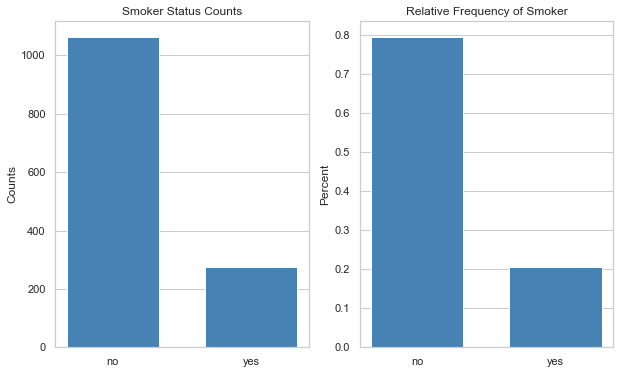

In [19]:
counts = data.smoker.value_counts().sort_index()
proportions = data.smoker.value_counts(normalize=True).sort_index()
x = range( len( counts))
width = 1/1.5
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 2, 1)
axes.bar(x, counts, width, color="steelblue", align="center")
axes.set_xticks([0, 1])
axes.set_xticklabels(counts.axes[0])
axes.set_title( "Smoker Status Counts")
axes.set_ylabel( "Counts")
axes.xaxis.grid(False)

axes = figure.add_subplot(1, 2, 2)
axes.bar(x, proportions, width, color="steelblue", align="center")
axes.set_xticks([0, 1])
axes.set_xticklabels(proportions.axes[0])
axes.set_title( "Relative Frequency of Smoker")
axes.set_ylabel( "Percent")
axes.xaxis.grid(False)




Summary: we have 80% non-smokers and 20% smokers in our insurance data

#### Relationships between charges and age

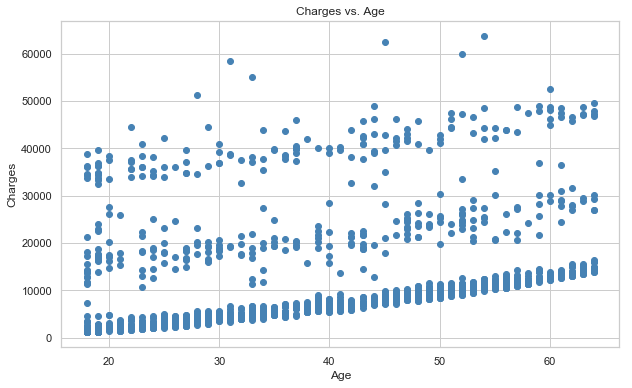

In [20]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(data.age, data.charges, marker="o", color="steelblue")

axes.set_ylabel("Charges")
axes.set_xlabel("Age")
axes.set_title("Charges vs. Age")

plt.show()
plt.close()

Summary: Charges seem to increase with the increase in age, especially for the minimum charges.

#### Relationships between charges and sex

In [21]:
grouped = data.groupby( "sex")
grouped_y = grouped["charges"].describe()
print(grouped_y)


        count          mean           std        min        25%         50%  \
sex                                                                           
female  662.0  12569.578844  11128.703801  1607.5101  4885.1587  9412.96250   
male    676.0  13956.751178  12971.025915  1121.8739  4619.1340  9369.61575   

                 75%          max  
sex                                
female  14454.691825  63770.42801  
male    18989.590250  62592.87309  


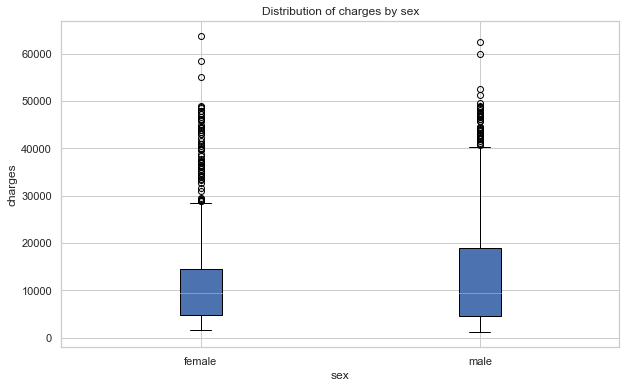

In [22]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
labels = pd.unique(data["sex"].values)
grouped_data = [grouped[ "charges"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
#for i, k in enumerate(labels):
#    subdata = grouped[ "charges"].get_group( k)
#    x = np.random.normal(i + 1, 0.01, size=len(subdata))
#    axes.plot(x, subdata, 'o', alpha=0.4, color="none", zorder=2)
axes.set_xlabel("sex")
axes.set_ylabel("charges")
axes.set_title("Distribution of charges by sex")
plt.show()
plt.close()


Summary: charges for female and male are fairly close with female at 12570 and male at 13957. However, male seem to have bigger interquartile range for the charges.

#### Relationships between charges and bmi

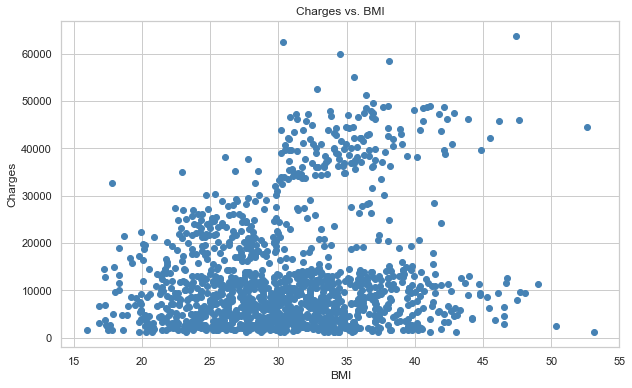

In [23]:
figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.scatter(data.bmi, data.charges, marker="o", color="steelblue")

axes.set_ylabel("Charges")
axes.set_xlabel("BMI")
axes.set_title("Charges vs. BMI")

plt.show()
plt.close()

Summary: there is not a clear relationship but we can see there are more higher charges at higher BMI zone.

#### Relationships between charges and children

In [24]:
grouped = data.groupby( "children")
grouped_y = grouped["charges"].describe()
print(grouped_y)

          count          mean           std        min          25%  \
children                                                              
0         574.0  12365.975602  12023.293942  1121.8739  2734.421150   
1         324.0  12731.171832  11823.631451  1711.0268  4791.643175   
2         240.0  15073.563734  12891.368347  2304.0022  6284.939438   
3         157.0  15355.318367  12330.869484  3443.0640  6652.528800   
4          25.0  13850.656311   9139.223321  4504.6624  7512.267000   
5          18.0   8786.035247   3808.435525  4687.7970  5874.973900   

                  50%           75%          max  
children                                          
0          9856.95190  14440.123825  63770.42801  
1          8483.87015  15632.052050  58571.07448  
2          9264.97915  20379.276748  49577.66240  
3         10600.54830  19199.944000  60021.39897  
4         11033.66170  17128.426080  40182.24600  
5          8589.56505  10019.943975  19023.26000  


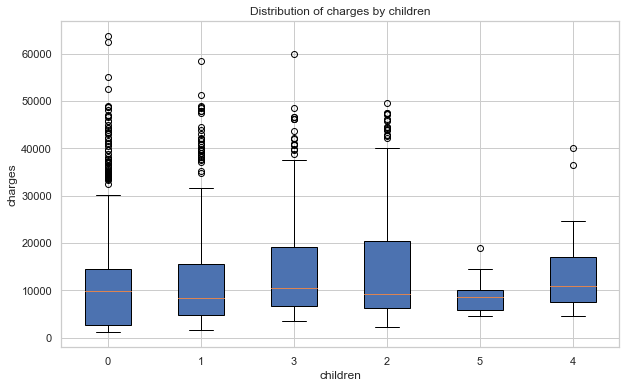

In [25]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
labels = pd.unique(data["children"].values)
grouped_data = [grouped[ "charges"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
#for i, k in enumerate(labels):
#    subdata = grouped[ "charges"].get_group( k)
#    x = np.random.normal(i + 1, 0.01, size=len(subdata))
#    axes.plot(x, subdata, 'o', alpha=0.4, color="none", zorder=2)
axes.set_xlabel("children")
axes.set_ylabel("charges")
axes.set_title("Distribution of charges by children")
plt.show()
plt.close()

Summary: mean and distribution of charges by children counts are fairly consistent. 5 children has much smaller range, it is probably due to small sample size.

#### Relationships between charges and smoker

In [26]:
grouped = data.groupby( "smoker")
grouped_y = grouped["charges"].describe()
print(grouped_y)

         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


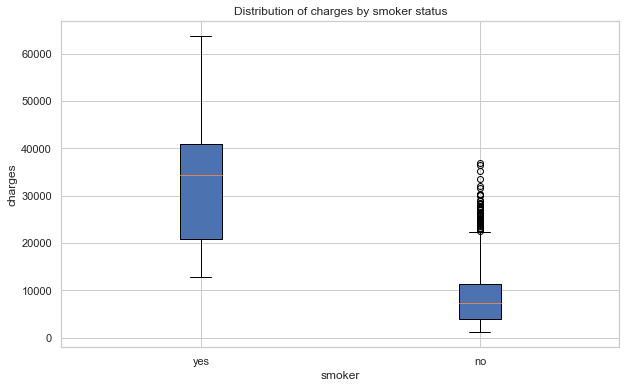

In [27]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
labels = pd.unique(data["smoker"].values)
grouped_data = [grouped[ "charges"].get_group( k) for k in labels]
patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)
#for i, k in enumerate(labels):
#    subdata = grouped[ "charges"].get_group( k)
#    x = np.random.normal(i + 1, 0.01, size=len(subdata))
#    axes.plot(x, subdata, 'o', alpha=0.4, color="none", zorder=2)
axes.set_xlabel("smoker")
axes.set_ylabel("charges")
axes.set_title("Distribution of charges by smoker status")
plt.show()
plt.close()

Summary: Smoker pays higher charges compared to non-smokers with smoker's average charge at 32050 and non-smoker at 8434.